In [2]:
#1e.
# The workhorses
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.special

# Plotting modules
import matplotlib.pyplot as plt

# This is to enable inline displays for the purposes of the tutorial
%matplotlib inline

# This enables SVG graphics inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Seaborn makes plots look nice
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
sns.set_style('darkgrid', {'axes.facecolor': '(0.875, 0.875, 0.9)'})



In [3]:
df= pd.read_csv("data/reeves_et_al/reeves_dv_profile_over_time.csv", comment="#")

#each column in original dataset represents ListOfNuclearCycles
ListOfNuclearCycles=["14","14","13","13","12","12","11","11"]

VarNames = ["DVCoordinate","Intensity"]*4

In [4]:
df.columns=pd.MultiIndex.from_arrays((ListOfNuclearCycles, VarNames), 
                                        names=['NC', 'variable'])

In [5]:
#getting a tidy dataset. the dataframe was not big, hence we just do it manually

TidyData=pd.concat((df["14"],df["13"],df["12"],df["11"])).reset_index(drop=True)
ListOfNC=sum(list(([int("14")]*44,[int("13")]*44,[int("12")]*44,[int("11")]*44)),[])
TidyData["NC"]=ListOfNC
TidyData = TidyData.dropna().reset_index(drop=True)

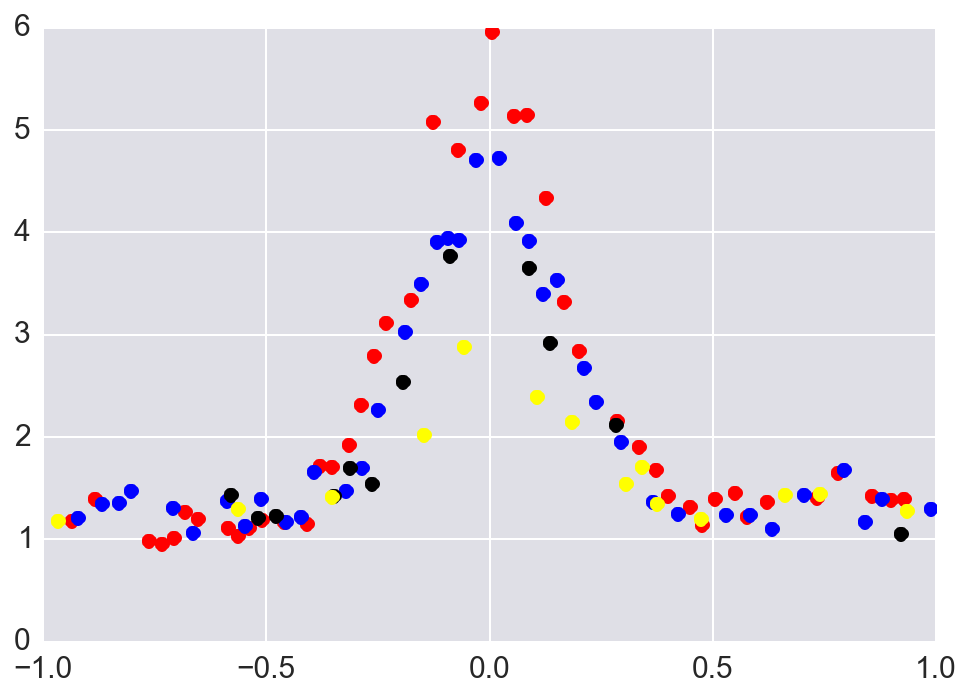

In [21]:
plt.plot(TidyData[TidyData["NC"]==14]["DVCoordinate"],TidyData[TidyData["NC"]==14]["Intensity"],".",markersize=15,color="red")
plt.plot(TidyData[TidyData["NC"]==13]["DVCoordinate"],TidyData[TidyData["NC"]==13]["Intensity"],".",markersize=15,color="blue")

plt.plot(TidyData[TidyData["NC"]==12]["DVCoordinate"],TidyData[TidyData["NC"]==12]["Intensity"],".",markersize=15,color="black")

plt.plot(TidyData[TidyData["NC"]==11]["DVCoordinate"],TidyData[TidyData["NC"]==11]["Intensity"],".",markersize=15,color="yellow")



In [22]:
secondDf=pd.read_csv("data/reeves_et_al/reeves_gradient_width_various_methods.csv", comment="#", )

In [24]:
secondDf.columns

Index(['wt', 'wt.1', 'dl1/+; dl-venus/+', 'dl1/+; dl-venus/+.1',
       'dl1/+; dl-venus/+.2', 'dl1/+; dl-gfp/+', 'dl1/+; dl-gfp/+.1',
       'dl1/+; dl-gfp/+.2'],
      dtype='object')

In [25]:
secondDf

,wt,wt.1,dl1/+; dl-venus/+,dl1/+; dl-venus/+.1,dl1/+; dl-venus/+.2,dl1/+; dl-gfp/+,dl1/+; dl-gfp/+.1,dl1/+; dl-gfp/+.2
0,wholemounts,cross-sections,anti-Dorsal,anti-Venus,Venus (live),anti-Dorsal,anti-GFP,GFP (live)
1,0.1288,0.1327,0.1482,0.1632,0.1666,0.2248,0.2389,0.2412
2,0.1554,0.1457,0.1503,0.1671,0.1753,0.1891,0.2035,0.1942
3,0.1306,0.1447,0.1577,0.1704,0.1705,0.1705,0.1943,0.2186
4,0.1413,0.1282,0.1711,0.1779,NaN,0.1735,0.2,0.2104
5,0.1557,0.1487,0.1342,0.1483,NaN,0.2135,0.256,0.2463
6,0.1689,0.1203,0.1773,0.1831,NaN,0.2129,0.2309,0.202
7,0.1417,0.1315,0.1705,0.1783,NaN,0.1782,0.1949,NaN
8,0.1315,0.1463,0.1596,0.1667,NaN,0.2011,0.2216,NaN
9,0.1664,0.1458,0.1601,0.178,NaN,0.1931,0.23,NaN


Compare the following equations:

\begin{align}
\tet{good: } &\sum_{i=1}^n i^3 